In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
boston = pd.read_csv('/content/drive/MyDrive/Materi Day 18/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Pertama, saya mau mengecek terlebih dahulu beberapa unique value dari kolom zn, chas, dan rad

In [ ]:
boston['zn'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [ ]:
boston['chas'].unique()

array([0, 1])

In [ ]:
boston['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [ ]:
# basic checking
# apakah ada missing value, duplicate rows atau tidak

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston.duplicated().sum()

0

Tidak ada missing value dan duplicate rows, jadi bisa dilanjutkan ke proses regresi

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns = 'medv')
target = boston[['medv']]

# first splitting: pretrain dan test
feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)

#second splitting: train dan validation
feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size = 0.20, random_state = 42)

In [ ]:
# multicollinearity checking
# menghitung VIF score untuk setiap feature

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

x = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(x.values, i)
                for i in range(x.shape[1])],
                index = x.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


Ada 4 feature yang vif scorenya bernilai moderate(4 - 10), yakni nox, dis, rad, tax. Selanjutnya akan dibuat heatmap correlation untuk menentukan feature mana yang akan di drop

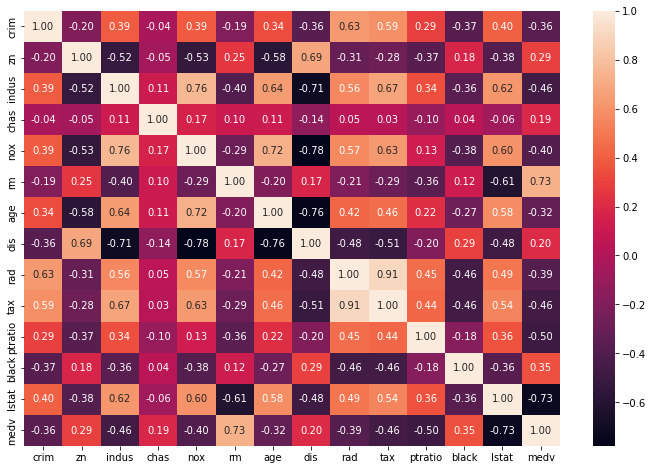

In [ ]:
# heatmap correlation

boston_train = pd.concat([feature_boston_train, target_boston_train], axis = 1)
corr = boston_train.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

Berdasarkan correlation heatmap di atas, diketahui bahwa feature-feature yang memiliki korelasi tinggi (> 0.8) adalah feature 'rad' dan 'tax sebesar 0.91.
Ketika membandingkan korelasi kedua feature ini terhadap target variable (medv), ternyata korelasi tax lebih besar dibanding korelasi rad. Maka dari itu selanjutnya kolom rad akan di drop

In [ ]:
# drop multicollinearity feature

feature_boston_train = feature_boston_train.drop(columns = 'rad')
feature_boston_validation = feature_boston_validation.drop(columns = 'rad')
feature_boston_test = feature_boston_test.drop(columns = 'rad')

In [ ]:
# melakukan rechecking vif

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

x = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(x.values, i)
                for i in range(x.shape[1])],
                index = x.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


Terlihat masih ada feature yang vif scorenya masih bernilai moderate, jadi akan ditampilkan kembali heatmap correlation agar bisa meng-drop feature feature lainnya

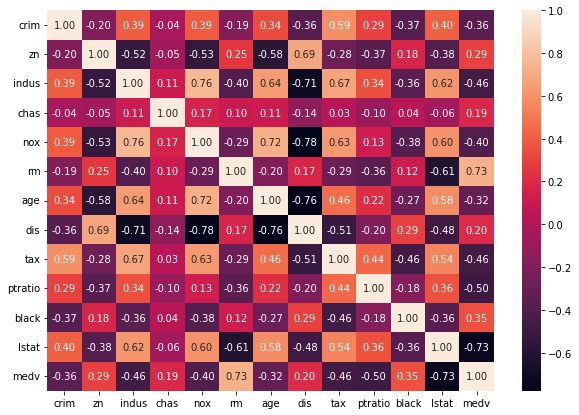

In [ ]:
boston_train = pd.concat([feature_boston_train, target_boston_train], axis = 1)
corr = boston_train.corr()

plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

Karena tidak ada korelasi yang > 0.8 sedangkan vif_score menunjukkan masih ada nilai yang moderate, maka kita akan menjaring juga korelasi yang bernilai > 0.7

Didapatkan 1 cluster tambahan yang memiliki korelasi > 0.7, yakni: indus-nox, indus-dis, nox-dis, nox-age, age-dis. Lalu dilihat antara feature-feature tersebut, manakah yang berkorelasi tinggi terhadap medv.

Ternyata, feature yang memiliki korelasi tinggi terhadap medv adalah indus (-0.46) sehingga feature nox, dis, dan age didrop

In [ ]:
# drop multicollinearity feature

feature_boston_train = feature_boston_train.drop(columns = ['nox', 'dis', 'age'])
feature_boston_validation = feature_boston_validation.drop(columns = ['nox', 'dis', 'age'])
feature_boston_test = feature_boston_test.drop(columns = ['nox', 'dis', 'age'])

In [ ]:
# rechecking vif

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

x = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(x.values, i)
                for i in range(x.shape[1])],
                index = x.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,crim,1.588941
2,zn,1.532709
3,indus,2.761396
4,chas,1.072011
5,rm,1.741200
6,tax,2.827007
7,ptratio,1.460082
8,black,1.343666
9,lstat,2.457787


VIF score sudah bernilai kecil semua sehingga selanjutnya bisa masuk ke tahap training model dengan berbagai nilai alpha (lambda)

In [ ]:
# Ridge regression
from sklearn.linear_model import Ridge

# train the model with Ridge
x_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model with 4 different alphas
ridge_reg_pointzeroone = Ridge(alpha = 0.01, random_state = 42)
ridge_reg_pointone = Ridge(alpha = 0.1, random_state = 42)
ridge_reg_one = Ridge(alpha = 1, random_state = 42)
ridge_reg_ten = Ridge(alpha = 10, random_state = 42)

# fit the model (training)
ridge_reg_pointzeroone.fit(x_boston_train, y_boston_train)
ridge_reg_pointone.fit(x_boston_train, y_boston_train)
ridge_reg_one.fit(x_boston_train, y_boston_train)
ridge_reg_ten.fit(x_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

In [ ]:
# find the best model (alpha)

from sklearn.metrics import mean_squared_error

x_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1, 10]
models = [ridge_reg_pointzeroone, ridge_reg_pointone, ridge_reg_one, ridge_reg_ten]

for model, alpha in zip(models, alphas):
  y_predict_validation = model.predict(x_boston_validation)
  rmse = np.sqrt(mean_squared_error(y_boston_validation, y_predict_validation))
  print(f'RMSE dengan nilai alpha = {alpha} adalah {rmse}')

RMSE dengan nilai alpha = 0.01 adalah 5.08928646079772
RMSE dengan nilai alpha = 0.1 adalah 5.088571810656439
RMSE dengan nilai alpha = 1 adalah 5.0816338864920825
RMSE dengan nilai alpha = 10 adalah 5.027060618750645


RMSE dengan nilai alpha = 10 memiliki RMSE paling kecil, yakni 5.02706. Maka untuk perhitungan ridge regression selanjutnya pada dataset ini akan digunakan alpha = 10

RMSE = 5.02706 artinya standar deviasi dari prediction error menggunakan ridge regression adalah 5.02706

In [ ]:
# selanjutnya analisis koefisien menggunakan ridge regression

ridge_best = ridge_reg_ten
coef_df = pd.DataFrame({
    'feature':['intercept']+feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})
coef_df

,feature,coefficient
0,intercept,7.107786
1,crim,-0.048538
2,zn,-0.016263
3,indus,0.057843
4,chas,2.140810
5,rm,5.216323
6,tax,-0.000235
7,ptratio,-0.870239
8,black,0.013113
9,lstat,-0.507393


Dari tabel di atas kita mendapatkan koefisien-koefisien yang mempengaruhi harga jual suatu rumah. Koefisien ini kemudian dijumlahkan hingga didapatkan sebuah formula untuk memprediksi harga rumah (medv).

Secara matematis dapat ditulis:
medv = 7.107786 - 0.048538 crim - 0.016263 zn + 0.057843 indus + 2.140810 chas + 5.216323 rm - 0.000235 tax - 0.870239 pratio + 0.013113 black - 0.507393 lstat

Asumsi: dengan menganggap feature lain bernilai tetap, setiap kenaikan 1 poin pada feature chas, berasosiasi dengan kenaikan 2.140810 poin pada medv

In [ ]:
# Lasso regression
from sklearn.linear_model import Lasso

# train the model with Lasso
x_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model with 4 different alphas
lasso_reg_pointzeroone = Lasso(alpha = 0.01, random_state = 42)
lasso_reg_pointone = Lasso(alpha = 0.1, random_state = 42)
lasso_reg_one = Lasso(alpha = 1, random_state = 42)
lasso_reg_ten = Lasso(alpha = 10, random_state = 42)

# fit the model (training)
lasso_reg_pointzeroone.fit(x_boston_train, y_boston_train)
lasso_reg_pointone.fit(x_boston_train, y_boston_train)
lasso_reg_one.fit(x_boston_train, y_boston_train)
lasso_reg_ten.fit(x_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

In [ ]:
# find the best model (alpha)

from sklearn.metrics import mean_squared_error

x_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1, 10]
models = [lasso_reg_pointzeroone, lasso_reg_pointone, lasso_reg_one, lasso_reg_ten]

for model, alpha in zip(models, alphas):
  y_predict_validation = model.predict(x_boston_validation)
  rmse = np.sqrt(mean_squared_error(y_boston_validation, y_predict_validation))
  print(f'RMSE dengan nilai alpha = {alpha} adalah {rmse}')

RMSE dengan nilai alpha = 0.01 adalah 5.085157906347982
RMSE dengan nilai alpha = 0.1 adalah 5.059655909413482
RMSE dengan nilai alpha = 1 adalah 4.8846734459521866
RMSE dengan nilai alpha = 10 adalah 5.4330815297186374


RMSE dengan nilai alpha = 1 memiliki RMSE paling kecil, yakni 4.88467. Maka untuk perhitungan lasso regression selanjutnya pada dataset ini akan digunakan alpha = 1

RMSE = 4.88467 artinya standar deviasi dari prediction error menggunakan lasso regression adalah 4.88467

In [ ]:
# selanjutnya analisis koefisien menggunakan lasso regression

lasso_best = lasso_reg_one
coef_df = pd.DataFrame({
    'feature':['intercept']+feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})
coef_df

,feature,coefficient
0,intercept,22.909724
1,crim,-0.028972
2,zn,-0.015200
3,indus,0.002053
4,chas,0.000000
5,rm,2.941434
6,tax,0.000029
7,ptratio,-0.805970
8,black,0.011680
9,lstat,-0.627903


Dari tabel di atas kita mendapatkan koefisien-koefisien yang mempengaruhi harga jual suatu rumah dengan menggunakan lasso regression. Koefisien ini kemudian dijumlahkan hingga didapatkan sebuah formula untuk memprediksi harga rumah (medv). Karakteristik lasso adalah bisa mengubah koefisien beberapa feature menjadi 0. Hal ini ditunjukkan pula dalam tabel di atas, dimana koefisien feature chas bernilai 0. Sehingga lasso regression menganggap setiap perubahan poin pada feature chas tidak mempengaruhi harga jual suatu rumah.

Secara matematis dapat ditulis:
medv = 22.909724 - 0.028972 crim - 0.015200 zn + 0.002053 indus + 2.941434 rm + 0.000029 tax - 0.805970 pratio + 0.011680 black - 0.627903 lstat

Asumsi: dengan menganggap feature lain bernilai tetap, setiap kenaikan 1 poin pada feature rm, berasosiasi dengan kenaikan 2.941434 poin pada medv

In [ ]:
# selanjutnya akan dilakukan model evaluation
# training data error menggunakan ridge regression

y_predict_train = ridge_best.predict(x_boston_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE untuk training data adalah {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE untuk training data adalah {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE untuk training data adalah {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE untuk training data adalah 4.977410615353436
MAE untuk training data adalah 3.513949332362259
MAPE untuk training data adalah 0.17358886099797727


In [ ]:
# testing error menggunakan ridge regression

x_boston_test = feature_boston_test.to_numpy()
y_predict_test = ridge_best.predict(x_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE testing data adalah {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE testing data adalah {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE testing data adalah {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE testing data adalah 5.479324428233193
MAE testing data adalah 3.406233090923041
MAPE testing data adalah 0.18294676209435864


RMSE menunjukkan ukuran standar deviasi(ketersebaran) data kita pada training maupun testing. Semakin besar nilai RMSE nya maka semakin kurang bagus pemodelan yang dibuat.

MAE mengukur seberapa jauh (secara absolut) prediksi model kita menyimpang dari data sebenarnya, sedangkan MAPE menunjukkan ukuran ketersimpangannya dalam persentase. Nilai MAE pada testing maupun training tidak terlalu berbeda jauh, sedangkan MAPE pada training = 17.35% dan MAPE pada testing = 18,29%. Tingginya nilai RMSE, MAE, dan persentase MAPE pada training dan testing bisa saja terjadi karena value dari medv juga bernilai besar.

Dengan melihat training performance dan testing performance, pemodelan yang dibuat sudah cukup bagus, walaupun terdapat selisih nilai RMSE, MAE, dan MAPE pada testing dan training, dimana nilai testing > training. Tapi menurut saya selisihnya tidak begitu jauh, sehingga pemodelan yang dibuat masih bisa dikatakan cukup bagus

In [ ]:
# training data error menggunakan lasso regression

y_predict_train = lasso_best.predict(x_boston_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE untuk training data adalah {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE untuk training data adalah {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE untuk training data adalah {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE untuk training data adalah 5.305048834092741
MAE untuk training data adalah 3.7812526295995066
MAPE untuk training data adalah 0.17632038279736761


In [ ]:
# testing error menggunakan lasso regression

x_boston_test = feature_boston_test.to_numpy()
y_predict_test = lasso_best.predict(x_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE testing data adalah {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE testing data adalah {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE testing data adalah {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE testing data adalah 5.33956016704644
MAE testing data adalah 3.572900527120014
MAPE testing data adalah 0.18399301988769076


Dengan menggunakan Lasso regression didapatkan nilai yang tidak jauh berbeda dari Ridge regression. Jadi bisa disimpulkan bahwa pemodelan menggunakan Lasso regression juga cukup bagus